In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import warnings

from torch.utils.data import DataLoader, TensorDataset
from google.colab import files
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, TargetEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
warnings.filterwarnings('ignore')
from google.colab import drive

In [107]:
import kagglehub
import os
drive.mount('/content/drive')
# Download latest version
path = '/content/drive/MyDrive/GoIt/DL_NLP/HW/ConcreteStrengthData.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
print(os.listdir('/content/drive/MyDrive/GoIt/DL_NLP/HW'))

['dz_topic_4.1_Yermak_Valeriy.ipynb', 'ConcreteStrengthData.csv']


In [109]:
# Зчитування файлу за абсолютним шляхом
df = pd.read_csv(path)

In [110]:
print('Previous analise by DataSet')
print(df.info())

df.describe()

df.head(10)

Previous analise by DataSet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            1030 non-null   float64
 1   BlastFurnaceSlag           1030 non-null   float64
 2   FlyAshComponent            1030 non-null   float64
 3   WaterComponent             1030 non-null   float64
 4   SuperplasticizerComponent  1030 non-null   float64
 5   CoarseAggregateComponent   1030 non-null   float64
 6   FineAggregateComponent     1030 non-null   float64
 7   AgeInDays                  1030 non-null   int64  
 8   Strength                   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB
None


,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [111]:
print("Пропущені значення по колонках:")
print(df.isnull().sum())

print("\nПропущені значення по рядках:")
print(df.isnull().sum(axis=1))

print('\nПропущені значення взагалі.')
print(df.isnull().values.any())

Пропущені значення по колонках:
CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent               0
SuperplasticizerComponent    0
CoarseAggregateComponent     0
FineAggregateComponent       0
AgeInDays                    0
Strength                     0
dtype: int64

Пропущені значення по рядках:
0       0
1       0
2       0
3       0
4       0
       ..
1025    0
1026    0
1027    0
1028    0
1029    0
Length: 1030, dtype: int64

Пропущені значення взагалі.
False


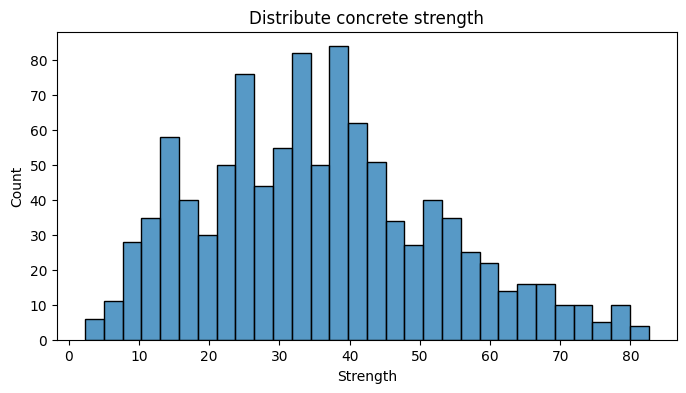

In [112]:
# Visualization of the distribution of the target variable(strength)
plt.figure(figsize=(8,4))
sns.histplot(df['Strength'], bins=30)
plt.title('Distribute concrete strength')
plt.show()

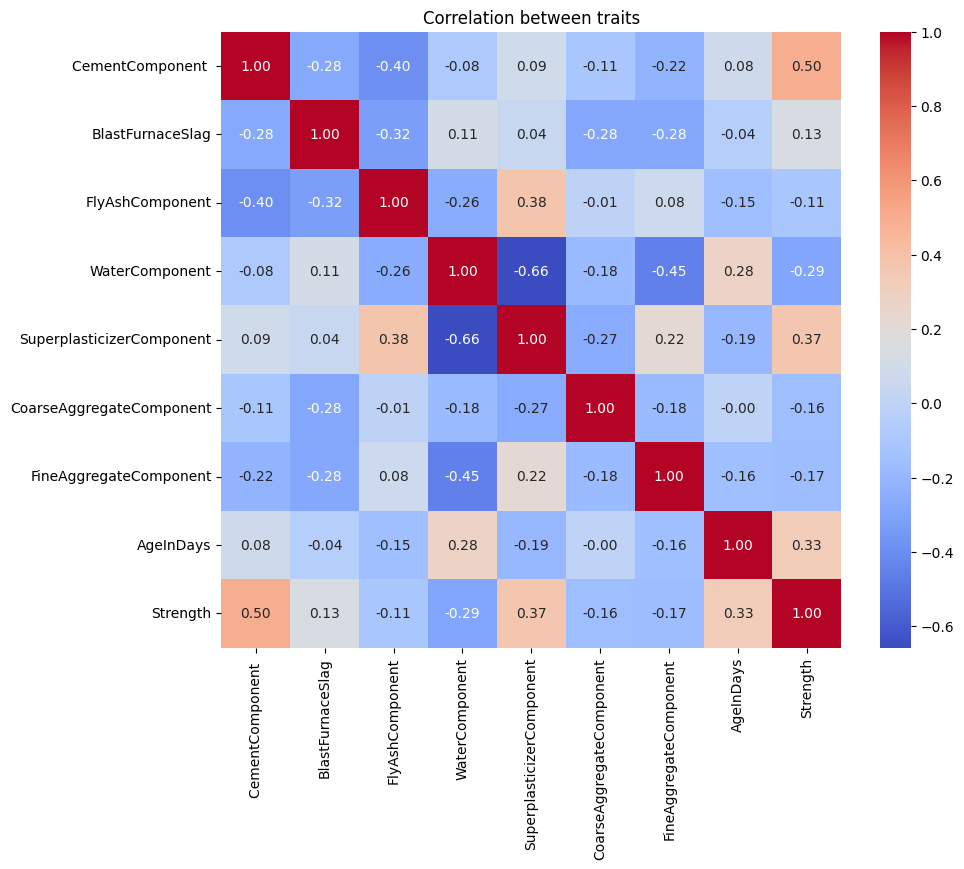

In [113]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation between traits')
plt.show()

In [114]:
#Separate the features and the target variable
X = df.drop('Strength', axis=1).values
y=df['Strength'].values

# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=37)

# Scaling Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Transfotm to tensor
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1,1)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1,1)

In [115]:
# Create a Model
class ConcreteStrangthModel(nn.Module):
  def __init__(self, input_dim):
    super().__init__()
    self.net = nn.Sequential(
        nn.Linear(input_dim, 64),
        nn.ReLU(),
        nn.Linear(64,32),
        nn.ReLU(),
        nn.Linear(32,1))
  def forward(self, x):
      return self.net(x)

model = ConcreteStrangthModel(input_dim=X_train.shape[1])
print(model)

ConcreteStrangthModel(
  (net): Sequential(
    (0): Linear(in_features=8, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=1, bias=True)
  )
)


In [116]:
# Set the learning

criterion = nn.MSELoss() # MSE suitable for regression fine large errors more strongly
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

batch_size = 32
epochs = 1000

# Dataloader for batchs
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [117]:
# Model training

for epoch in range(epochs):
  model.train()
  total_loss = 0
  for X_batch, y_batch in train_loader:
    optimizer.zero_grad()
    outputs = model(X_batch)
    loss = criterion(outputs, y_batch)
    loss.backward()
    optimizer.step()
    total_loss += loss.item()*X_batch.size(0)

  avg_loss = total_loss / len(train_loader.dataset)
  if (epoch+1) % 10 == 0 or epoch ==0:
    print(f'Epoch [{epoch+1}/{epochs}], Loss:{avg_loss:.4f}')

Epoch [1/1000], Loss:950.2512
Epoch [10/1000], Loss:100.5890
Epoch [20/1000], Loss:56.3573
Epoch [30/1000], Loss:58.2143
Epoch [40/1000], Loss:47.3299
Epoch [50/1000], Loss:49.5982
Epoch [60/1000], Loss:42.3388
Epoch [70/1000], Loss:40.6986
Epoch [80/1000], Loss:43.3233
Epoch [90/1000], Loss:45.1620
Epoch [100/1000], Loss:36.3878
Epoch [110/1000], Loss:51.7455
Epoch [120/1000], Loss:27.9780
Epoch [130/1000], Loss:30.4617
Epoch [140/1000], Loss:35.5358
Epoch [150/1000], Loss:34.7009
Epoch [160/1000], Loss:23.7000
Epoch [170/1000], Loss:25.9968
Epoch [180/1000], Loss:20.2325
Epoch [190/1000], Loss:25.2481
Epoch [200/1000], Loss:19.4645
Epoch [210/1000], Loss:22.2870
Epoch [220/1000], Loss:19.1625
Epoch [230/1000], Loss:12.7728
Epoch [240/1000], Loss:17.7491
Epoch [250/1000], Loss:19.6192
Epoch [260/1000], Loss:12.0590
Epoch [270/1000], Loss:11.7907
Epoch [280/1000], Loss:12.8494
Epoch [290/1000], Loss:13.0652
Epoch [300/1000], Loss:13.2345
Epoch [310/1000], Loss:11.7397
Epoch [320/1000],

In [118]:
# Evaluation of the model

model.eval()
with torch.no_grad():
  y_pred = model(X_test_tensor).numpy()

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Test MSE: {mse:.4f}')
print(f'Test MAE: {mae:.4f}')
print(f'Test R2: {r2:.4f}')

Test MSE: 22.3169
Test MAE: 3.2209
Test R2: 0.9183


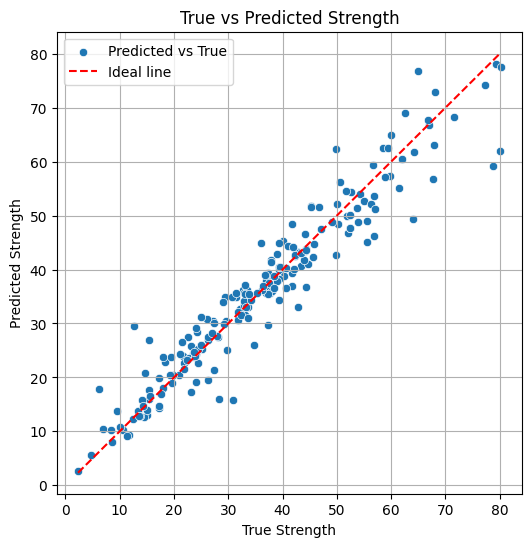

In [126]:
y_test_flat = y_test.ravel()
y_pred_flat = y_pred.ravel()

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_flat, y=y_pred_flat, label='Predicted vs True')
plt.plot([y_test_flat.min(), y_test_flat.max()], [y_test_flat.min(), y_test_flat.max()], 'r--', label='Ideal line')
plt.xlabel('True Strength')
plt.ylabel('Predicted Strength')
plt.title('True vs Predicted Strength')
plt.legend()
plt.grid(True)
plt.show()

In [122]:
y_test_flat = y_test.squeeze()
y_pred_flat = y_pred.squeeze()

In [123]:
print(type(y_test), y_test.shape)
print(type(y_pred), y_pred.shape)

<class 'numpy.ndarray'> (206,)
<class 'numpy.ndarray'> (206, 1)


**Результати оцінки моделі:**

* **Test MSE** (Mean Squared Error): 22.3169
Це середньоквадратична помилка: модель у середньому помиляється на ~22.3 одиниці у квадраті. Менше — краще. Але це число складно інтерпретувати напряму, бо воно в квадратних одиницях.

* **Test MAE** (Mean Absolute Error): 3.2209
Це середня абсолютна помилка: модель у середньому помиляється на 3.22 одиниці міцності. Ця метрика більш інтерпретована — зручно у прикладних завданнях.

* **Test R²** (коефіцієнт детермінації): 0.9183
Це означає, що 91.83% дисперсії цільової змінної пояснюється моделлю. Це дуже хороший результат (чим ближче до 1 — тим краще).

**Висновки про модель:**
1. Модель добре навчається і добре узагальнює:

  * Високий R² (0.9183) показує, що модель добре вловлює залежності між ознаками та цільовим значенням (міцністю бетону).

  * Низька MAE (3.22) говорить про невеликі помилки, прийнятні для більшості реальних задач.

2. Помилки є, але вони не критичні:

  * Якщо реальні значення міцності мають діапазон, скажімо, від 0 до 80, то помилка ±3 — цілком прийнятна.

3. Модель придатна для практичного використання:

  * Наприклад, у будівництві, щоб прогнозувати міцність бетону на основі складу суміші.

**Підсумок:**

Модель працює дуже добре. Результати свідчать про високу точність і практичну цінність.